# Boston Housing Visualization&Prediction

보스턴 하우싱은 간단한 데이터로 변수는 다음과 같다.  

 ![nn](image1.png)

각 변수들은 집값에 영향을 줄 수 있는 것들이며,  
이를 통해, Boston에 있는 집 가격을 예측하는 것을 목표로 한다.  
데이터가 깔끔하고 작지만, 회귀 자체는 난이도가 있다.  
시각화를 통해, 분포와 상관관계를 파악하고 이를 바탕으로 회귀할 것이다.  

# Contents

### 1. Data Load and Feature 
### 2. Data Visualizaion
### 3. Data Pre-processing
### 4. Regression Predict 
### 5. Conclusion

## 1. Data Load and Feature

In [1]:
# Packages Download

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('BostonHousing.csv')

In [3]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [4]:
print(data.dtypes) 

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [6]:
print("NA 데이터 숫자 :",data.isna().sum().sum())

NA 데이터 숫자 : 0


모든 변수는 CHAS를 제외하고 숫자변수이며, NA값이 존재하지 않는다.

데이터가 500개인 반면 변수가 12개로 많은 편이기에, 이 부분에 대해서 변수선택을 선정하는 것이 메인 이슈라 생각한다.  

회귀분석은 개인적으로 분류를 위한 알고리즘 사용은 좋아하지 않으므로  
선형인 Linear Regression과 비선형인 MLP로 진행할 것이다.  

## 2. Data Visualizaion

* **1. 숫자 변수가 너무 많아 상관관계에 유의할 필요가 있다. - heatmap**
* **2. 각 변수들이 숫자 변수이므로, 분포를 파악할 필요가 있다 - boxplot , distplot** 
* **3. 이상치에도 예민해서 - scatter plot과 boxplot을 유의할 필요가 있다.**

In [7]:
data2 = data[data.columns[:-1]]
data2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

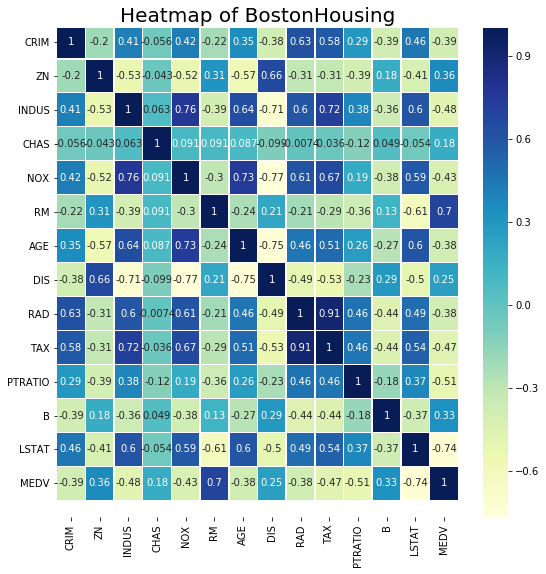

In [8]:
# Correlation HeatMap
fig, ax = plt.subplots(figsize=(9,9)) 

ax = sns.heatmap(data2.corr(),linewidths=.5,cmap='YlGnBu', annot = True)
buttom , top = ax.get_ylim()
ax.set_ylim(buttom+1, top-0.4)

plt.title('Heatmap of BostonHousing', fontsize=20)
plt.show() 

회귀분석은 변수간 독립적일 것이 전제이므로, 변수 간 상관관계가 높은 변수는 제외하는 것이 좋다.  
추가로, Train Set가 400개이므로 12개라는 변수는 Overfitting에 취약할 것이다.

대표적으로 NOX와 DIS처럼 산업지구이면 자연스럽게 거주비율이 주는 것과 같은 것이 존재한다.

In [12]:
data3 = data2.drop(['CHAS'],axis=1)

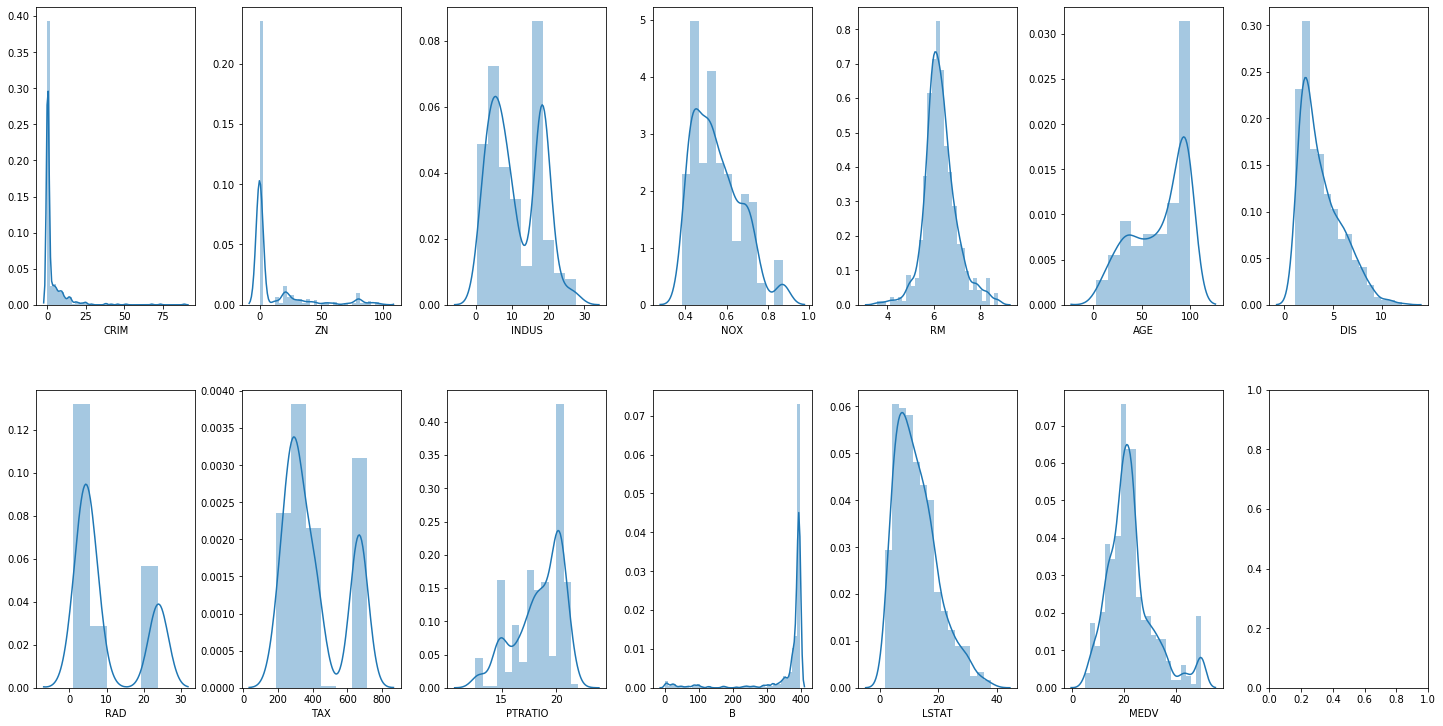

In [13]:
# Distribution Visualization 
# Histogram
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data3.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# 출처 : https://www.kaggle.com/prasadperera/the-boston-housing-dataset

CRIM과 ZN의 경우 포아송 분포와 유사해 보이므로, log를 통해 정규화를 만들어 주는 것이 유의미 할 수 있다.  
nox, rm, age, dis, ptratio, lstat, medv의 경우 분포가 어느 정도 정규분포를 이룬다.  
B의 경우 right skewed함으로, sqare를 통해 정규분포 유사를 만들수 있다.

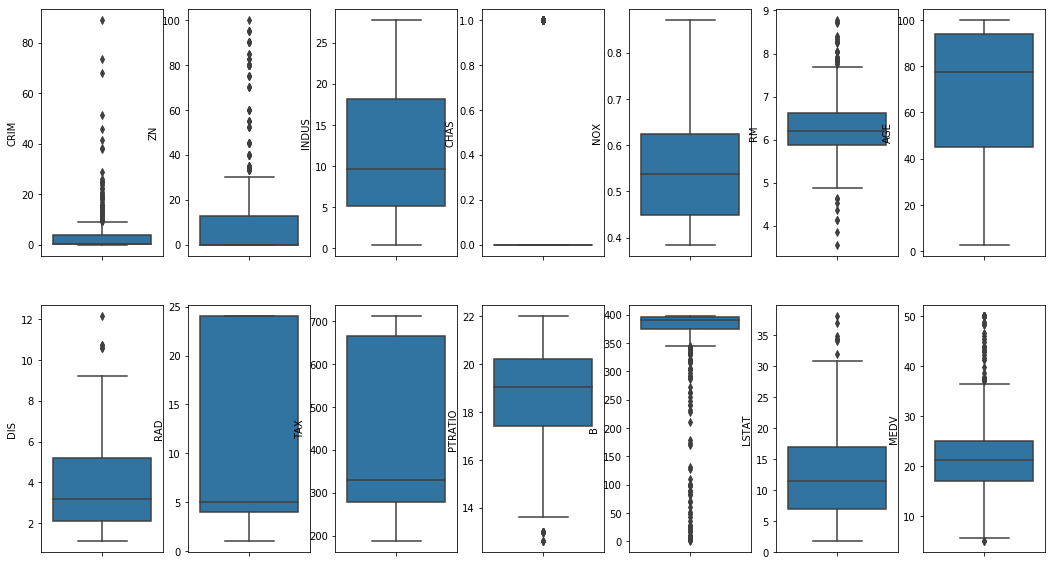

In [14]:
# BoxPlot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(18, 10))
index = 0
axs = axs.flatten()
for k,v in data2.items():
    sns.boxplot(v, ax=axs[index], orient = 'v')
    index += 1
# 수정 필요 사항 - label 위치 변경 및 색깔 차이

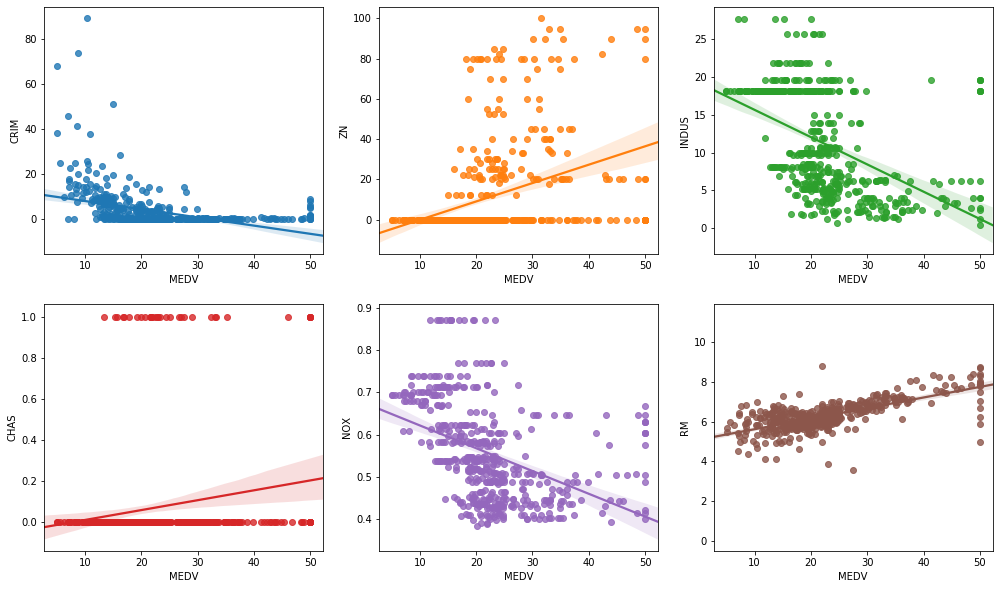

In [15]:
# Scatter Plot by MEDV
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(17, 10))
index = 0
axs = axs.flatten()
for k,v in data2[data2.columns[:6]].items():
    sns.regplot(y=v, x=data2['MEDV'], ax=axs[index])
    index += 1
#axs.set_xticklabels(axs.get_xticklabels(), rotation=45)

**CRIM** -높은것은 확실히 집값이 낮다.  
**zn** - 높으면 의미가 있지만, 30 이상은 의미가 없어 연속 변수로 사용하기에 MSE가 올라갈 가능성이 높다.  
**INDUS** - 거주지 비율로, 낮을수록 거주지다. 높을때는 집값이 낮은 것은 타당하나 그 외의 경우는 오차가 커, 적절하게 변화하는 것이 좋다.  
**CHAS** - 무의미해 보인다.  
**NOX** 일산화 탄소 농도이다.역시 indus와 연관이 높다. 둘 중하나는 삭제하는게 좋아보인다.  
**RM** - 의미가 있다. 방의 개수와 집값은 직결되기 때문이다.  
* **사용할 변수 - crim, zn, indus, medv**

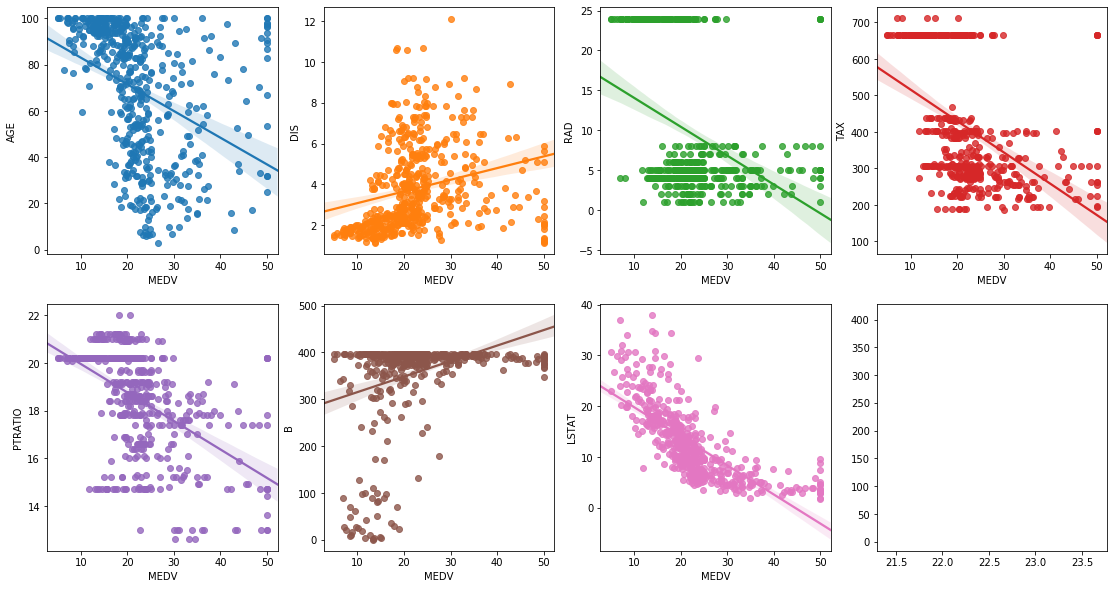

In [16]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(19, 10))
index = 0
axs = axs.flatten()
for k,v in data2[data2.columns[6:-1]].items():
    sns.regplot(y=v, x=data2['MEDV'], ax=axs[index])
    index += 1
#axs.set_xticklabels(axs.get_xticklabels(), rotation=45)

**AGE** - 특정한 의미를 부여하기 어려울 수 있다. 오래되어서 비싼 경우가 있고 아닌 경우가 있다. 
**DIS** - 상관관계도 낮고 분포도 별로다 삭제하자.  
**RAD** - 택스와 상관관계가 매우높다. 반면 택스가 더 상관관계가 높아서 택스가 더 낮다.  
**TAX** - 사용  
**PTRATION** - 학생이 없을 수록 집값이 더 높다.  
**B** - black으로 특별히 의미가없다. boxplot상 거의 다 300~400이기 때문이다.  
**RSTAT** - 유의미하다.  
* **사용할 변수 - tax, ptratio, rstat**

## 3. Data Pre-processing

* 시각화를 통해 선정된 변수들  
    CRIM. INDUS - 더미화
    ZN - 분포에 따라 이상치를 75%값정도로 변경해준다.
    MEDV, TAX, PTRATIO LSAT - MinMax Scaling

전처리를 위해서 해야할 부분은 크게 3가지로 보인다.
1. 쓸데없는 칼럼 삭제
2. CRIM, INDUS를 더미변수로 변경
3. 이상치 소거
4. 정규화 한다.

In [17]:
train = pd.read_csv('BostonHousing.csv')
train = train[train.columns[:-1]]
train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [18]:
# 1. 쓸데없는 칼럼 삭제
del_columns = ['CHAS', 'NOX','AGE','DIS','RAD','B'] # 버리는 변수 6개, 독립변수 7, 종속변수 1
train.drop(del_columns, inplace = True, axis=1)

In [19]:
# CRIM 변수 더미화
train.loc[train['CRIM'] <5, ['CRIM']] =0
train.loc[train['CRIM'] >=5, ['CRIM']] = 1 

In [20]:
# ZN 변수 이상치 낮추기
train.loc[train['ZN'] >12.5, ['ZN']] =12.5

In [21]:
# INDUS 15기준 나누기
print("15 이상의 수 :",len(train.loc[train['INDUS'] > 15, ['INDUS']]))
print("15 이하의 수 :",len(train.loc[train['INDUS'] <= 15, ['INDUS']]))

train.loc[train['INDUS'] <= 15, ['INDUS']] = 0
train.loc[train['INDUS'] > 15, ['INDUS']] = 1

15 이상의 수 : 192
15 이하의 수 : 314


In [22]:
# 전처리 여부확인
train[['CRIM','ZN','INDUS']].describe()

,CRIM,ZN,INDUS
count,506.000000,506.000000,506.000000
mean,0.209486,3.310277,0.379447
std,0.407345,5.520939,0.485730
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,12.500000,1.000000
max,1.000000,12.500000,1.000000


In [23]:
#숫자변수 정규화
#(train['RM'] - train['RM'].min())/(train['RM'].max() - train['RM'].min())
def StandardNormal(a,col) :
    a[col] = (a[col] - a[col].min())/(a[col].max() - a[col].min())
StandardNormal(train,'RM')
StandardNormal(train,'TAX')
StandardNormal(train,'ZN')
StandardNormal(train,'PTRATIO')
StandardNormal(train,'LSTAT')
StandardNormal(train,'MEDV')

In [24]:
train.describe()

,CRIM,ZN,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.209486,0.264822,0.379447,0.521869,0.422208,0.622929,0.301409,0.389618
std,0.407345,0.441675,0.485730,0.134627,0.321636,0.230313,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.445392,0.175573,0.510638,0.144040,0.267222
50%,0.000000,0.000000,0.000000,0.507281,0.272901,0.686170,0.265728,0.360000
75%,0.000000,1.000000,1.000000,0.586798,0.914122,0.808511,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Regression Predict

1. Data_Split - Train과 Test 비율을 80:20정도로 변경
2. OLS, SKLEARN 통한 regression - OLS는 P - value를 확인할 수 있는 장점이 있는데 패키지 다운 에러로 제외했다.
3. RIDGE와 LASSO를 통해 변수 제어
4. MLP(Multi Layer Perceptron) 구현 - 예측알고리즘을 너무 오랜만에 해서 그냥 제외

In [25]:
# Load Package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [26]:
# Data Split
X = train[train.columns[:-1]]
Y = train[train.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
print("x train, y train = ", x_train.shape, y_train.shape)
print("x test, y test = ", x_test.shape, y_test.shape)

x train, y train =  (404, 7) (404,)
x test, y test =  (102, 7) (102,)


In [27]:
# Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

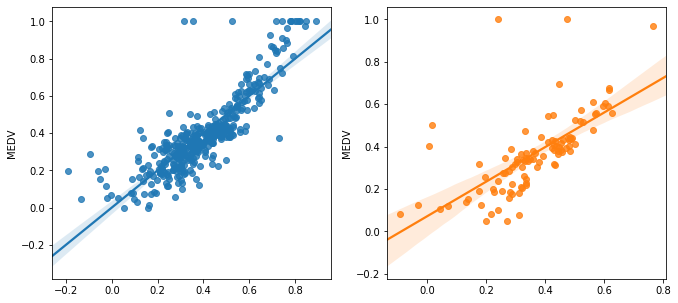

In [28]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11, 5))

ax = sns.regplot(reg.predict(x_train),y_train, ax = axs[0])
ax2 = sns.regplot(reg.predict(x_test),y_test)

In [29]:
print("train score : %0.4f" %reg.score(x_train, y_train), "  test score :", reg.score(x_test,y_test))
print("train r2_score :%0.4f" %r2_score(reg.predict(x_train),y_train), "test r2_score : ",r2_score(reg.predict(x_test),y_test))
print("train MSE : %0.4f" %mean_squared_error(reg.predict(x_train),y_train),"    test MSE : ",mean_squared_error(reg.predict(x_test),y_test))

#'''print("score :", reg.score(x_test,y_test))
#print("r2_score : ",r2_score(reg.predict(x_test),y_test))
#print("MSE : ",mean_squared_error(reg.predict(x_test),y_test))


train score : 0.7195   test score : 0.4316773290701672
train r2_score :0.6101 test r2_score :  0.17004972071057478
train MSE : 0.0122     test MSE :  0.019042221877736288


In [30]:
import statsmodels.api as sm

In [31]:
# OLS(최소자승법) 
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              797.1
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                   2.43e-229
Time:                        14:39:00   Log-Likelihood:                          299.66
No. Observations:                 404   AIC:                                     -585.3
Df Residuals:                     397   BIC:                                     -557.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

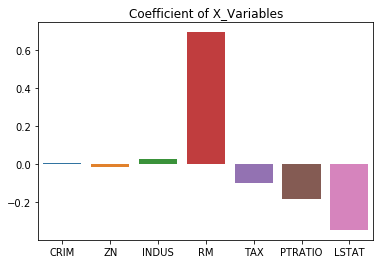

In [32]:
plt.title("Coefficient of X_Variables")
sns.barplot(x = x_train.columns, y= reg.coef_)
plt.show()

RM과 LSTAT이 Coefficient가 높은 것을 파악할 수 있다  
P - value가 ZN과 INDUS가 매우높다. 어느정도 예상한 결과이긴 하며, 이 변수를 소거하는 것이 더 좋을 수도 있다.

In [33]:
# Lasso Regression
lasso = Lasso()
lasso.fit(x_train, y_train)

lasso_train_score = []
lasso_test_score = []
lasso_set = [0.01,0.1, 1 ,10]
max_iter = [100, 1000, 2000]

coef = []
for i in lasso_set:
    for j in max_iter:
        lasso=Lasso(alpha=i, max_iter= j)
        lasso.fit(x_train, y_train)
        lasso_tr_score = round(lasso.score(x_train, y_train), 3)
        lasso_te_score = round(lasso.score(x_test, y_test), 3)
        lasso_train_score.append(lasso_tr_score)
        lasso_test_score.append(lasso_te_score)
        coef.append(lasso.coef_)

print(lasso_train_score)
print(lasso_test_score)


[0.585, 0.585, 0.585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.518, 0.518, 0.518, -0.025, -0.025, -0.025, -0.025, -0.025, -0.025, -0.025, -0.025, -0.025]


결과가 안좋다.

In [36]:
# Ridge Regression
ridge = Ridge()
ridge.fit(x_train, y_train)

alpha_train_score = []
alpha_test_score = []
alpha_set = [0.01,0.1, 1 ,10]
coefs = []


for i in alpha_set:
    ridge=Ridge(alpha=i)
    ridge.fit(x_train, y_train)
    ridge_tr_score = round(ridge.score(x_train, y_train), 3)
    ridge_te_score = round(ridge.score(x_test, y_test), 3)
    alpha_train_score.append(ridge_tr_score)
    alpha_test_score.append(ridge_te_score)
    coefs.append(ridge.coef_)

print(alpha_train_score)
print(alpha_test_score)

[0.719, 0.719, 0.716, 0.639]
[0.432, 0.438, 0.473, 0.49]


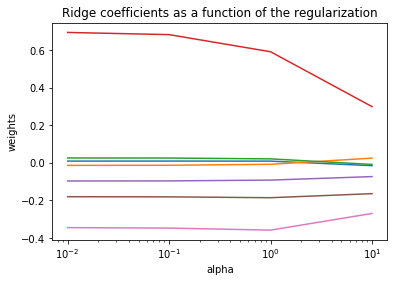

In [37]:
ax = plt.gca()

ax.plot(alpha_set, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

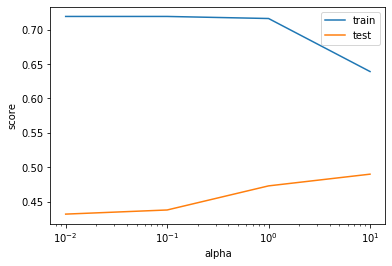

In [38]:
ax = plt.gca()
ax.plot(alpha_set,alpha_train_score)
ax.plot(alpha_set, alpha_test_score)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(("train", "test"))
plt.show()

## 5. Conclusion

1. 시각화를 통해, 변수들의 분포와 상관관계를 고려하는 것이 좋은 시도였던 것 같다.
2. Test 정확도가 더 높으며, Plotting 과정에서 나쁘지 않게 나온 것 같다.

3. 한계점 
 - 3.1 변수선택법을 사용하는 것이 결과가 아마 더 좋았을 듯하다.
 - 3.2 Ridge나 Lasso 결과가 부정적이다. 튜닝을 잘못했을 확률이 크다. 
 - 3.3 시각화와 변수 선택의 접근은 좋지만, 결과는 긍정적이지 못하다.
